In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient

query = Fido.search(a.Time('2021-09-06', '2021-09-08'), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

In [ ]:
Fido

In [2]:
files = Fido.fetch(query)

Files Downloaded: 100%|█████████████████████████| 3/3 [00:00<00:00, 25.93file/s]


In [24]:
files

['/Users/thomas/sunpy/data/solo_L1_stix-ql-lightcurve_20210908_V01.fits', '/Users/thomas/sunpy/data/solo_L1_stix-ql-lightcurve_20210907_V01.fits', '/Users/thomas/sunpy/data/solo_L1_stix-ql-lightcurve_20210906_V01.fits']

In [29]:
ql_lightcurves[0]

QLLightCurve
    Start: 2021-09-08 00:01:23
    End:   2021-09-09 00:01:19
    Center:2021-09-08 12:01:21
    Duration:0.9999536994650811 days or
           23.998888787161945 hours or
           1439.9333272297167 minutes or
           86395.99963378301 seconds

AttributeError: 'list' object has no attribute 'savefig'

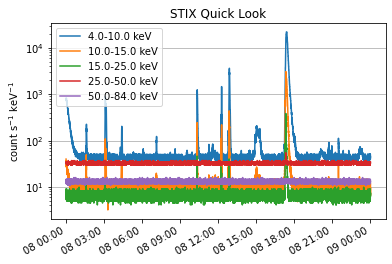

In [51]:
from sunpy.timeseries import TimeSeries
from stixpy import timeseries

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from sunpy import timeseries as ts

sample_path = '/Users/thomas/SS Research Project'



ql_lightcurves = TimeSeries(files)


# lc_plot = ts.TimeSeries(files)


#fig = plt.figure(figsize=(12, 8))
fig = ql_lightcurves[0].plot()

fig.savefig(sample_path + "/STIX_plot.png")

# fig = plt.figure(figsize=(12, 8))
# fig = ql_lightcurves[0].plot()

#ax = plt.subplot(111)
#ql_lightcurves[0].plot()

# ax.plot(ql_lightcurves[0])

# plt.show()

# lc_plot.plot()

# ax.set_title('STIX X-ray Flux 2021-09-07')
# #ax.set_ylim([10**-9, 10**-2])
# ax.set_ylabel("counts s$^{-1}$ keV$^{-1}$")
# ax.set_xlabel("Time (UT)")

# date_format = mdates.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(date_format)

# fig.savefig(sample_path + "/STIX_plot.png")

TypeError: float() argument must be a string or a number, not 'QLLightCurve'

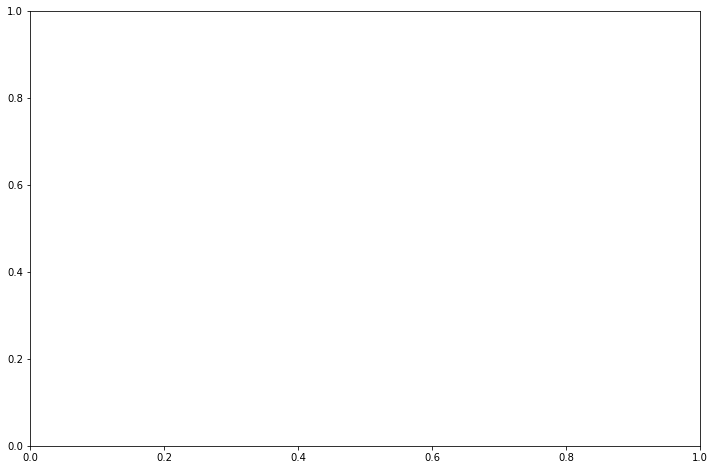

In [28]:
combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)


fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(combined_ts)


In [8]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient

query = Fido.search(a.Time('2020-06-05', '2020-06-07'), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

URLError: <urlopen error [Errno 60] Operation timed out>

In [49]:
    def plot(self, axes=None, **plot_args):
        """
        Show a plot of the data.
        Parameters
        ----------
        axes : `~matplotlib.axes.Axes`, optional
            If provided the image will be plotted on the given axes.
            Defaults to `None`, so the current axes will be used.
        **plot_args : `dict`, optional
            Additional plot keyword arguments that are handed to
            :meth:`pandas.DataFrame.plot`.
        Returns
        -------
        axes : `~matplotlib.axes.Axes`
            The plot axes.
        """
        import matplotlib.pyplot as plt
        # Get current axes
        if axes is None:
            fig, axes = plt.subplots()

        self._validate_data_for_plotting()
        quantity_support()

        dates = matplotlib.dates.date2num(self.to_dataframe().index)

        label = f'{self.columns[2]} keV'

        axes.plot_date(dates, self.to_dataframe().iloc[:, 2], '-', label=label, **plot_args)

        axes.legend(loc='upper right')

        axes.set_yscale("log")

        axes.set_title('STIX Quick Look Variance')
        axes.set_ylabel('count s$^{-1}$ keV$^{-1}$')

        axes.yaxis.grid(True, 'major')
        axes.xaxis.grid(False, 'major')
        axes.legend()

        # TODO: display better tick labels for date range (e.g. 06/01 - 06/05)
        formatter = matplotlib.dates.DateFormatter('%d %H:%M')
        axes.xaxis.set_major_formatter(formatter)

        axes.fmt_xdata = matplotlib.dates.DateFormatter('%d %H:%M')
        fig.autofmt_xdate()

        return fig